# Prosper Loan Data Exploration
## by Jeffrey Van Anderson

## Preliminary Wrangling

**Introduction:**
> This document explores data from 113,936 loans from "Prosper" and an extensive 81 variables.  Univariate, bivariate and finally multivatiate visualizations are used as the primary exploritory tools here.  This data will be used to ask which variables affect the borrower's APR/interest rate

**Step 1:** First, all the necessary packages are imported and `*.csv` data file is imported as pandas dataframe

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
#import *.csv file as pandas dataframe and display first five lines
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


**Step 2:** Next, information is displayed about the dataframe in order to become familiar with the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

**Step 3:**  After briefly previewing the data, it is clear that there are excessive column variables to address in this one report.  A select few are queried and applied to a new dataframe for analysis.

In [4]:
#create list of collumns to keep for analysis
cols_to_keep = ['ListingKey', 'BorrowerAPR', 'Term', 'IncomeRange', 'EmploymentStatus',
                'LoanOriginalAmount', 'DebtToIncomeRatio', 'ListingCategory (numeric)', 
                'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'AmountDelinquent']

#assign queried collumns as df_trimmed variable
df_trimmed = df[cols_to_keep]

#confirm successful trim
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                   113937 non-null object
BorrowerAPR                  113912 non-null float64
Term                         113937 non-null int64
IncomeRange                  113937 non-null object
EmploymentStatus             111682 non-null object
LoanOriginalAmount           113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
ListingCategory (numeric)    113937 non-null int64
IsBorrowerHomeowner          113937 non-null bool
DelinquenciesLast7Years      112947 non-null float64
AmountDelinquent             106315 non-null float64
dtypes: bool(1), float64(4), int64(3), object(3)
memory usage: 8.8+ MB


**Step 4:** With the separate dataframe, `df_trimmed` having fifteen columns, a few more functions can be applied to learn more about the data

In [5]:
#review distribution of data in variables
df_trimmed.describe()

,BorrowerAPR,Term,LoanOriginalAmount,DebtToIncomeRatio,ListingCategory (numeric),DelinquenciesLast7Years,AmountDelinquent
count,113912.000000,113937.000000,113937.00000,105383.000000,113937.000000,112947.000000,106315.000000
mean,0.218828,40.830248,8337.01385,0.275947,2.774209,4.154984,984.507059
std,0.080364,10.436212,6245.80058,0.551759,3.996797,10.160216,7158.270157
min,0.006530,12.000000,1000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.156290,36.000000,4000.00000,0.140000,1.000000,0.000000,0.000000
50%,0.209760,36.000000,6500.00000,0.220000,1.000000,0.000000,0.000000
75%,0.283810,36.000000,12000.00000,0.320000,3.000000,3.000000,0.000000
max,0.512290,60.000000,35000.00000,10.010000,20.000000,99.000000,463881.000000


In [6]:
#view null value totals for each column
df_trimmed.isnull().sum()

ListingKey                      0
BorrowerAPR                    25
Term                            0
IncomeRange                     0
EmploymentStatus             2255
LoanOriginalAmount              0
DebtToIncomeRatio            8554
ListingCategory (numeric)       0
IsBorrowerHomeowner             0
DelinquenciesLast7Years       990
AmountDelinquent             7622
dtype: int64

**Step 5:**  After inspection, there are a few more tidyness and cleanliness issues that need to be addressed as follows:
* `ListingCategory (numeric)` title needs to be shortened
* there is null data in a few columns
* some datatypes should be changed
 * `Term` should be categorical
 * `IncomeRange` should be categorical 
 * `IsBorrowerHomeowner` needs to be string for this type of categorical analysis
* the `ListingCategory` column values should be replaced with strings to avoid unnecesssary referencing

In [7]:
#remove ' (numeric)' string from `ListingCategory`
df_trimmed = df_trimmed.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"})
df_trimmed.head(1)

,ListingKey,BorrowerAPR,Term,IncomeRange,EmploymentStatus,LoanOriginalAmount,DebtToIncomeRatio,ListingCategory,IsBorrowerHomeowner,DelinquenciesLast7Years,AmountDelinquent
0,1021339766868145413AB3B,0.16516,36,"$25,000-49,999",Self-employed,9425,0.17,0,True,4.0,472.0


In [8]:
#create list of columns with nulls
nulls_todrop = ['EmploymentStatus', 'DebtToIncomeRatio',
                'DelinquenciesLast7Years', 'AmountDelinquent']

#drop row observalions where there are nulls in each specified column
for col in nulls_todrop:
    df_trimmed = df_trimmed[df_trimmed[col].notnull()]


In [9]:
#create dictionary of desired orders for each category
cat_dict = {'Term' : [12, 36, 60],
            'IncomeRange' : ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999',
                             '$50,000-74,999', '$75,000-99,999', '$100,000+']}

#loop over two dictionary variables and apply each ordered list to categorical Dtype
for col in cat_dict:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = cat_dict[col])
    df_trimmed[col] = df_trimmed[col].astype(order)


In [10]:
#change bool data to string for categorical analysis
df_trimmed['IsBorrowerHomeowner'] = df_trimmed['IsBorrowerHomeowner'].astype('str')

In [11]:
#confirm success of changed dtypes
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97905 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                 97905 non-null object
BorrowerAPR                97905 non-null float64
Term                       97905 non-null category
IncomeRange                97905 non-null category
EmploymentStatus           97905 non-null object
LoanOriginalAmount         97905 non-null int64
DebtToIncomeRatio          97905 non-null float64
ListingCategory            97905 non-null int64
IsBorrowerHomeowner        97905 non-null object
DelinquenciesLast7Years    97905 non-null float64
AmountDelinquent           97905 non-null float64
dtypes: category(2), float64(4), int64(2), object(3)
memory usage: 7.7+ MB


In [12]:
#change `ListingCategory` from integer to category string
#first change dtype to string for iteration
df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].astype('str')

#assign dictionary of category name to number
cat_dict = {'0' : 'Not Available',
            '1' : 'Debt Consolidation',
            '2' : 'Home Improvement', 
            '3' : 'Business',
            '4' : 'Personal Loan',
            '5' : 'Student Use',
            '6' : 'Auto', 
            '7' : 'Other',
            '8' : 'Baby&Adoption',
            '9' : 'Boat',
            '10' : 'Cosmetic Procedure',
            '11' : 'Engagement Ring',
            '12' : 'Green Loans',
            '13' : 'Household Expenses', 
            '14' : 'Large Purchases',
            '15' : 'Medical/Dental',
            '16' : 'Motorcycle',
            '17' : 'RV',
            '18' : 'Taxes',
            '19' : 'Vacation',
            '20' : 'Wedding Loans'}

#loop over column and replace numbers with category strings
for num, string in cat_dict.items():
    df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].replace(num, string)

#confirm success
df_trimmed['ListingCategory'].value_counts()

Debt Consolidation    54628
Other                  9531
Not Available          9161
Home Improvement       6959
Business               5205
Auto                   2363
Personal Loan          2271
Household Expenses     1788
Medical/Dental         1404
Large Purchases         806
Taxes                   788
Wedding Loans           732
Vacation                722
Student Use             605
Motorcycle              289
Engagement Ring         201
Baby&Adoption           191
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              46
Name: ListingCategory, dtype: int64

**Step 5.5:** Since the two columns: `AmountDelinquent`, and `DelinquenciesLast7Years` need to have zeroes disregarded in order to perform exploratory analysis in the next section, these zeroes should be replaced with null values.

In [13]:
#replace zeroes with NaN values in the three specified columns
del_cols = ['AmountDelinquent', 'DelinquenciesLast7Years']
df_trimmed[del_cols] = df_trimmed[del_cols].replace({0 : np.nan})

#ensure success
df_trimmed[del_cols].describe()

,AmountDelinquent,DelinquenciesLast7Years
count,15525.000000,31100.00000
mean,6326.955684,12.69299
std,17003.297287,14.14363
min,1.000000,1.00000
25%,248.000000,3.00000
50%,1072.000000,8.00000
75%,5078.000000,17.00000
max,463881.000000,99.00000


In [14]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97905 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                 97905 non-null object
BorrowerAPR                97905 non-null float64
Term                       97905 non-null category
IncomeRange                97905 non-null category
EmploymentStatus           97905 non-null object
LoanOriginalAmount         97905 non-null int64
DebtToIncomeRatio          97905 non-null float64
ListingCategory            97905 non-null object
IsBorrowerHomeowner        97905 non-null object
DelinquenciesLast7Years    31100 non-null float64
AmountDelinquent           15525 non-null float64
dtypes: category(2), float64(4), int64(1), object(4)
memory usage: 7.7+ MB


**Step 6:** Now that the data is wrangled, it is time to reflect on it prior to exploratory analysis.

### What is the structure of your dataset?

> After some trimming, tidying and wrangling the dataframe to be explored has considerably fewer columns than the original dataset; however, the number of rows are less since incomplete data was dropped.  There are eleven columns in the resulting dataframe (ten variables and one key) and 97,905 rows or loan records with no null values except for the two delinquency columns.  These two columns have nulls instead of zeroes for further analysis

> For the eleven variable collumns, there are the following data types:
> * there are five numeric columns (four float and one integer)
> * there are two ordered categorical columns for `Term` and `IncomeRange`
> * there are two object or string columns for unordered categories
> * finally, the `IsBorrowerHomeowner` column is a simple bool answer.

### What is/are the main feature(s) of interest in your dataset?

> Of primary interest is which variables effect the APR of loans.  Additionally, it would be interesting to see if `AmountDelinquent` is of any consequence to the APR or if they are related to `DelinquenciesLast7Years`.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each of the variables could very well effect the `BorrowerAPR` with the exception of `AmountDelinquent`.  This is since the `AmountDelinquent` variable was taken at the time of record and not the time of loan; however, it may be effected by the `BorrowerAPR`.  

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**Step 1:** The following four countplots are of the categorical variables with the least variety of variables.  These are not very meaningful without bivariate analysis.  Perhaps a heatmap will be of use.

It is of note that the majority of loans are for 36 months and the majority of borrowers are homeowners.  However, it is not surprising that the typical income is concentrated between 25 and 75 thousand dollars.

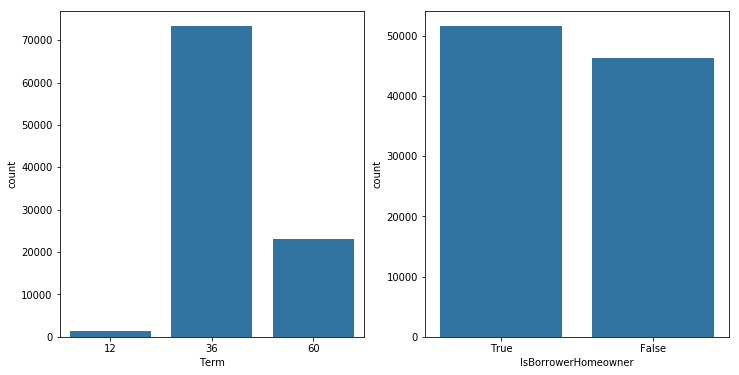

In [15]:
#set first color in seaborn color_palette to the `base_color` variable for less distracting bar charts
base_color = sns.color_palette()[0]

#plots two bar charts of loans by `Term` and `IsBorrowerHomeowner`
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data = df_trimmed, x = 'Term', color = base_color, ax = ax[0])
sns.countplot(data = df_trimmed, x = 'IsBorrowerHomeowner', color = base_color, ax = ax[1]);

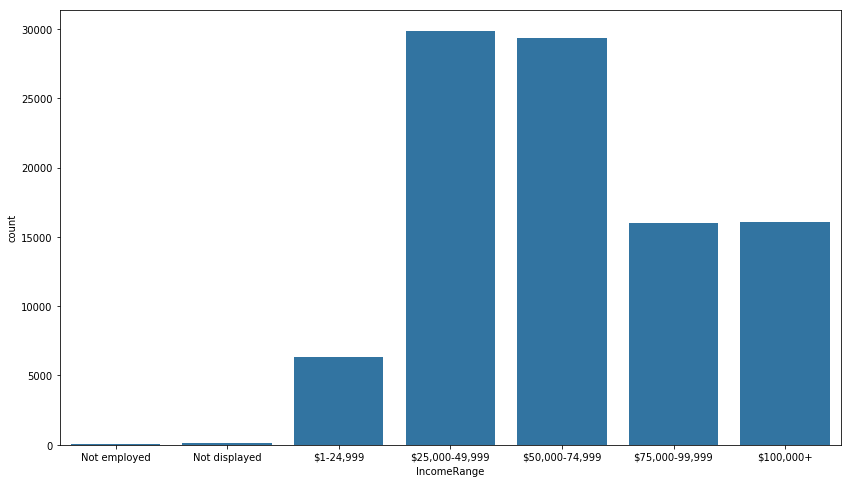

In [16]:
#plots a bar chart of loans by `IncomeRange`
plt.figure(figsize=(14,8))
sns.countplot(data = df_trimmed, x = 'IncomeRange', color = base_color);

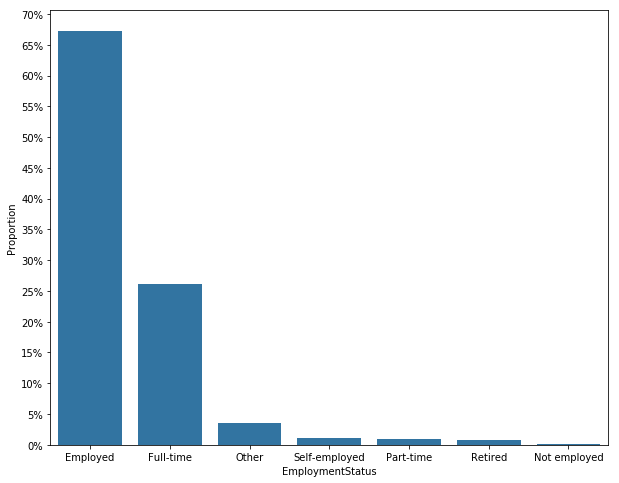

In [17]:
#creates variables for proportional tickmarks in preparation for plotting bar chart
n_points = df_trimmed.shape[0]
max_count = df_trimmed['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{}%'.format(int(i*100)) for i in tick_props]

#assigns order by descending value_count to `es_order` variable
es_order = df_trimmed.EmploymentStatus.value_counts().index

#plots a bar chart of loans by `EmploymentStatus`
plt.figure(figsize=(10,8))
sns.countplot(data = df_trimmed, x = 'EmploymentStatus', color = base_color, order = es_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion');

**Step 2:** The next countplot summarizes `ListingCategory` as it has twenty different categorical vaiables.  Interestingly, the vast majority of loans were for debt consolidation.  It might be useful to group the remaining categories for interpretability; however, since there are about 10,000 observations where this information is not available, it would not be possible to infer any statistically significance based on the data.  This is a dead end.

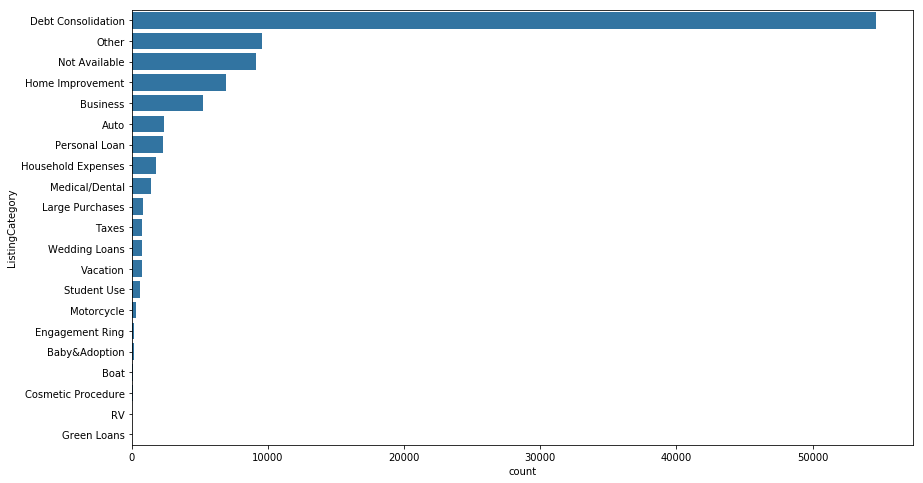

In [18]:
#assigns order by descending value_count to `lc_order` variable
lc_order = df_trimmed.ListingCategory.value_counts().index

#plots a bar chart of loans by `ListingCategory`
plt.figure(figsize=(14,8))
sns.countplot(data = df_trimmed, y = 'ListingCategory', color = base_color, order = lc_order);

**Step 3:** Now it is time to view the primary variable of interest `DebtToIncomeRatio`.  When viewed as a histogram, the distribution of APR is fairly shocking.  The distribution appears to center around 20% with an abnormal concentration at 35%.  Perhaps this APR is attributed to a certain categorical variable?

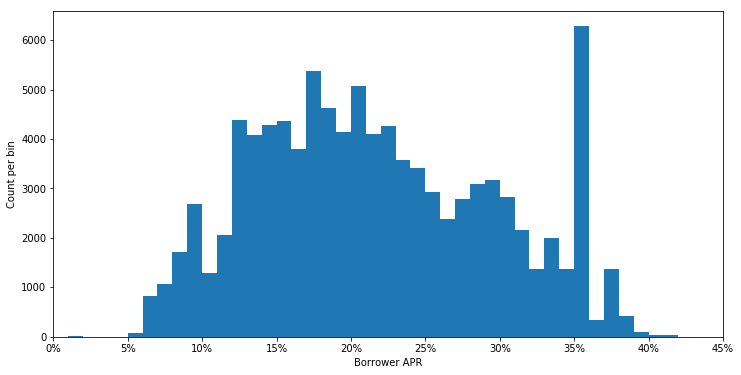

In [19]:
#Creates an array of bins at a specified binsize for histogram
binsize = 0.01 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)
ticks = np.arange(0, df_trimmed['BorrowerAPR'].max() + 0.05, 0.05)
tick_names = ['{}%'.format(int(i*100)) for i in ticks]

#plots a histogram of `BorrowerAPR`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'BorrowerAPR', bins = bins)
plt.xlim([0, 0.45])
plt.xticks(ticks, tick_names)
plt.xlabel('Borrower APR')
plt.ylabel('Count per bin');

**Step 4:** Next, a histogram is created to interpret the distribution of the `LoanOriginalAmount` variable.  Insightfully, Prosper appears to approve more loans at the following five specific dollar amounts: 
* $4,000

* $10,000

* $15,000

* $20,000

* $25,000

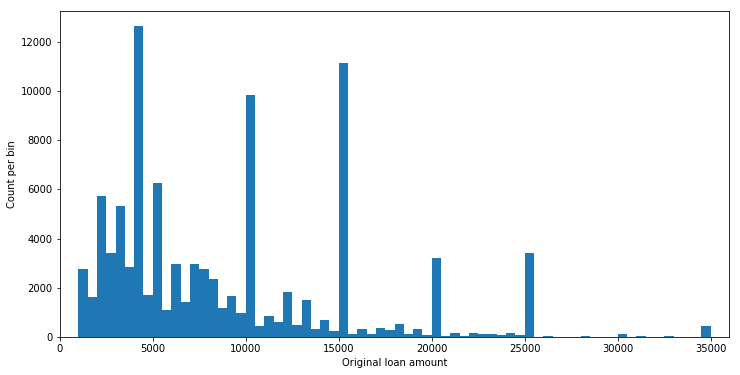

In [20]:
#Creates an array of bins at a specified binsize for histogram
binsize = 500 
bins = np.arange(0, df_trimmed['LoanOriginalAmount'].max() + binsize, binsize)

#plots a histogram of `LoanOriginalAmount`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,36000])
plt.xlabel('Original loan amount')
plt.ylabel('Count per bin');

**Step 5:** In order to display the `DebtToIncomeRatio` as a histogram, intuition would suggest that there are extreme outliers as this is a wealth category.  When the pandas `df.describe()` function is used, this becomes clear as one observation had a DTI of greater than 10.  

In order to compensate for outliers, a z-score is calculated for the data distribution.  Then the values that fall within that z-score are appended to a list.  Finally, the bin edges of the resulting histogram are determined on the maximum non-outlier value with an acceptible z-score. 

The resulting histogram is heavily right-skewed with the highest concentration of DTI ratios just below 0.25.  Further bivariate and miltivariate analysis will be needed to see how this compares to other variables.

In [21]:
#view distribution of debt to income ratio
df_trimmed['DebtToIncomeRatio'].describe()

count    97905.000000
mean         0.276037
std          0.524517
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [22]:
#loops ove `DebtToIncomeRatio` column and appends the non-outlier values to the `amt_del_non_outliers` list
DTI_non_outliers = []
mean = df_trimmed['DebtToIncomeRatio'].mean()
std = df_trimmed['DebtToIncomeRatio'].std()

for value in df_trimmed['DebtToIncomeRatio']:
    z_score = (value - mean) / std
    if np.abs(z_score) < 3:
        DTI_non_outliers.append(value)

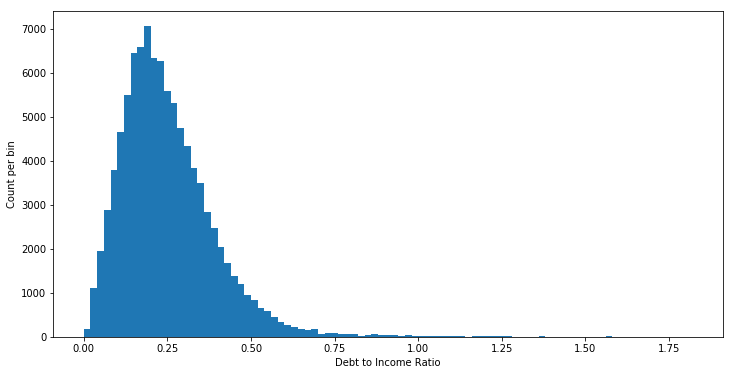

In [23]:
#Creates an array of bins at a specified binsize for histogram
binsize = 0.02 
bins = np.arange(0, np.max(DTI_non_outliers) + binsize, binsize)

#plots a histogram of `DebtToIncomeRatio`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'DebtToIncomeRatio', bins = bins)
#plt.xlim([0,36000])
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count per bin');

**Step 6:** Without the inclusion of zeroes due to preliminary data cleaning, the distribution of `DelinquenciesLast7Years` is a lot clearer.  This distribution appears to have lower counts of observations for higher frequencies of delinquencies.  This is not surprising.

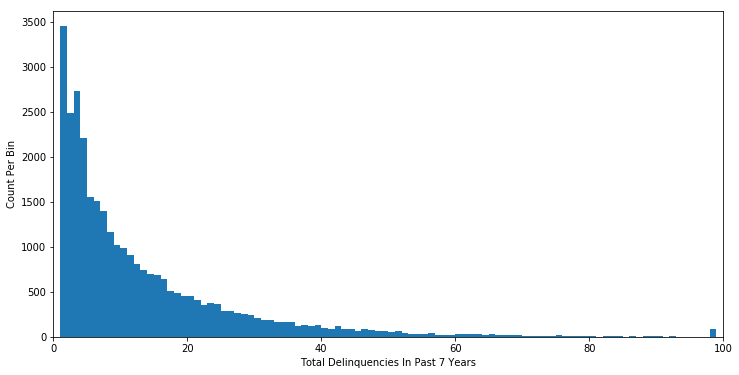

In [24]:
#Creates an array of bins at a specified binsize for histogram
binsize = 1
bins = np.arange(0, df_trimmed['DelinquenciesLast7Years'].max() + binsize, binsize)

#plots a histogram of `LoanOriginalAmount`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'DelinquenciesLast7Years', bins = bins)
plt.xlim([0,100])
plt.xlabel('Total Delinquencies In Past 7 Years')
plt.ylabel('Count Per Bin');

**Step 7:** Next, the `AmountDelinquent` histogram is displayed.  Once again, this plot is heavily right skewed with what appear to be outliers at a glance. As a result, the bins are filtered by outliers with the same method as **Step 5** for a closer look.

In [25]:
#displays summary statistics of `AmountDelinquent` column
df_trimmed['AmountDelinquent'].describe()

count     15525.000000
mean       6326.955684
std       17003.297287
min           1.000000
25%         248.000000
50%        1072.000000
75%        5078.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [26]:
#loops ove `AmountDelinquent` column and appends the non-outlier values to the `amt_del_non_outliers` list
amt_del_non_outliers = []
mean = df_trimmed['AmountDelinquent'].mean()
std = df_trimmed['AmountDelinquent'].std()

for value in df_trimmed['AmountDelinquent']:
    z_score = (value - mean) / std
    if np.abs(z_score) < 3:
        amt_del_non_outliers.append(value)

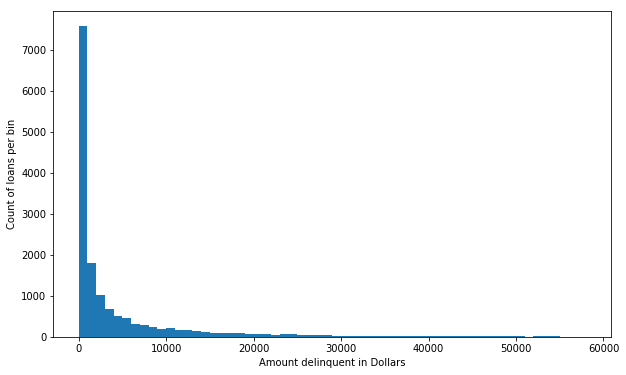

In [27]:
#sets bin edges and binsize based on non-outliers
binsize = 1000
bins = np.arange(0, np.max(amt_del_non_outliers) + binsize, binsize)

#plots histogram of `AmountDelinquent` based of specified bin edges
plt.figure(figsize=(10,6))
plt.hist(x = amt_del_non_outliers, bins = bins)
plt.xlabel('Amount delinquent in Dollars')
plt.ylabel('Count of loans per bin');

**Step 7.5:** Since the above histogram is still extremely right skewed, it appears that the amount of potential outliers were not distracting the data.  Instead, this can be displayed by the logorithmic histogram below.  Naturally, Amount delinquent is lower for the majority of loans and gradually higher for a select few.  This heavily skewed data is probably not useful for further analysis since it wpuld be increadibly hard to interprate in bivariate and multivariate ways.

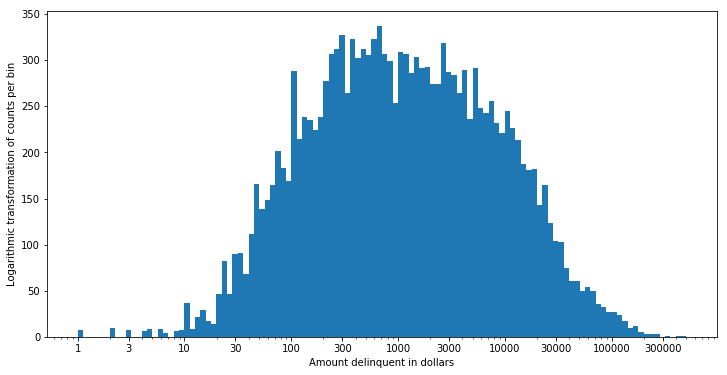

In [28]:
#Take log of `AmountDelinquent` and apply to bins
log_data = np.log10(df_trimmed['AmountDelinquent'])
log_bins = 10 ** np.arange(0, np.max(log_data)+ 0.05, 0.05)

#plot logarithmic transformation of `AmountDelinquent`
plt.figure(figsize=(12,6))
plt.hist(df_trimmed['AmountDelinquent'], bins = log_bins)
plt.xscale('log')
tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Amount delinquent in dollars')
plt.ylabel('Logarithmic transformation of counts per bin');


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the primary variable of interest: `BorrowerAPR`, it was surprising to see how high the rates actually were with a strange concentration around 35%.  This distribution raises some questions about impact from other categorical variables.
>
> For the categorical variables displayed in a univariate way, there is not very insightful data, these need to be compared with eachother and/or other quantitative variables.
>
> For the remaining quantitative variables, there are no surprising distributions; however, the `AmountDelinquent` data is so skewed that it is probably too hard to interperate in any further investigation. This is true even after a logorithmic transformation.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Once again, the `BorrowerAPR` distribution was quite strange with a concentration around 35%
>
> Additionally, the `DebtToIncomeRatio` had significant outliers with one exceeding a ration of 10.  This required filtering by outliers and will likely effect the data if not addressed in bivariate analysis as well.

## Bivariate Exploration



**Step 1:** First, a pair grid and heatmap should be displayed to quickly determine whether there is any correlation between any quantitative variables in the dataframe.

However, the outliers in the `AmountDelinquent` and `DebtToIncomeRatio` columns are be stripped of outliers in case they interfere with correlation.

Additionally, two lists of variables are created for the quantitative columns and qualitative columns for easy coding later.

In [29]:
#assign quantitative and qualitative variables to separate lists for easy coding
cat_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'ListingCategory', 'IsBorrowerHomeowner']
quant_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio',
              'DelinquenciesLast7Years', 'AmountDelinquent']

In [30]:
#drop outliers from `AmountDelinquent` for statistical analysis
for value in df_trimmed['AmountDelinquent']:
    if value not in amt_del_non_outliers:
        df_trimmed['AmountDelinquent'].replace({value : np.nan}, inplace=True)


In [31]:
#drop outliers from `DebtToIncomeRatio`
for value in df_trimmed['DebtToIncomeRatio']:
    if value not in DTI_non_outliers:
        df_trimmed['DebtToIncomeRatio'].replace({value : np.nan}, inplace=True)   

#ensure success for last two cells       
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97905 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey                 97905 non-null object
BorrowerAPR                97905 non-null float64
Term                       97905 non-null category
IncomeRange                97905 non-null category
EmploymentStatus           97905 non-null object
LoanOriginalAmount         97905 non-null int64
DebtToIncomeRatio          97500 non-null float64
ListingCategory            97905 non-null object
IsBorrowerHomeowner        97905 non-null object
DelinquenciesLast7Years    31100 non-null float64
AmountDelinquent           15226 non-null float64
dtypes: category(2), float64(4), int64(1), object(4)
memory usage: 10.2+ MB


C:\Users\jeffr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jeffr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


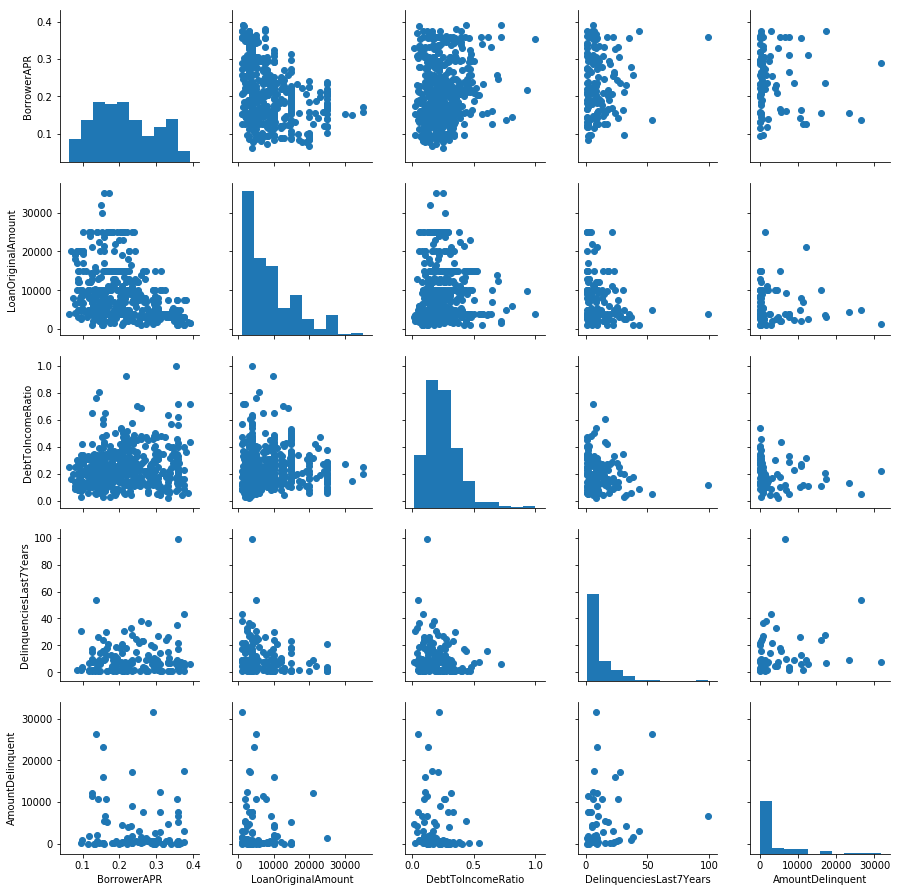

In [32]:
#randomly sample 500 data points from data
sample = np.random.choice(df_trimmed.shape[0], 500, replace = False)
data = df_trimmed.iloc[sample,:]

#use pairgrid to compare all five quantitative variables from sample
g = sns.PairGrid(data = data, vars = quant_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

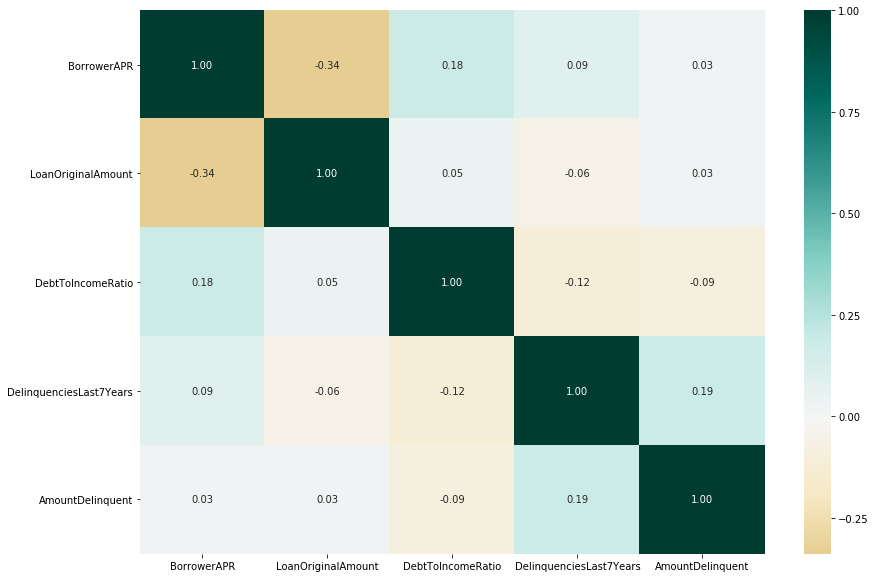

In [33]:
#display heatmap of five quantitative variables for more accurate view of correlation coefficients
plt.figure(figsize = [14, 10])
sns.heatmap(df_trimmed[quant_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'BrBG', center = 0);

**Step 2:** Unfortunately, there does not appear to be any significant correlation between any of the quantitative variables. Perhaps there is too much noise in the data or there are other lurking variables.  

As a result,  it is time to compare `BorrowerAPR` to all of the qualitative variables with violinplots.

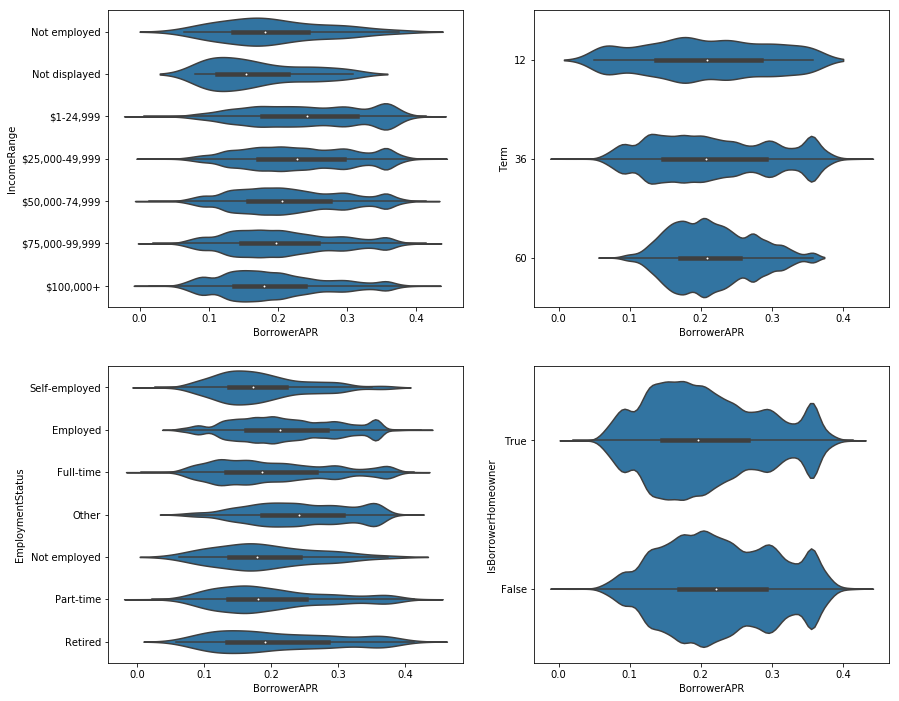

In [34]:
#set appropriate plotsize with four subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

#plot four violin plots of qualitative variables against `BorrowerAPR`
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'IncomeRange', color = base_color, ax = ax[0, 0])
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'Term', color = base_color, ax = ax[0, 1])
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'EmploymentStatus', color = base_color, ax = ax[1, 0])
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'IsBorrowerHomeowner',  color = base_color, ax = ax[1, 1]);


**Step 2.5:** In order to have a intelligable interperetation of the `ListingCategory` column, the strings are simply consolidated into two categories: 'Debt Consolidation' and 'Other'.  

The the final violin plot is displayed.

In [35]:
#create a index object variable of `ListingCategory` values
List_cats = df_trimmed['ListingCategory'].value_counts().index

#remove 'Debt Consolidation' from index object
List_cats = List_cats.drop('Debt Consolidation')

#loop over `ListingCategory` column and replace values with other
for string in List_cats:
    df_trimmed['ListingCategory'].replace({string : 'other'}, inplace =True)

#ensure success
df_trimmed['ListingCategory'].value_counts()

Debt Consolidation    54628
other                 43277
Name: ListingCategory, dtype: int64

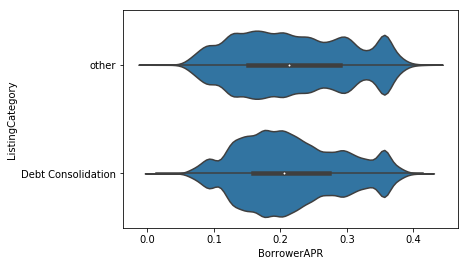

In [36]:
#display violinplot of the two resulting `ListingCategory` categories
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'ListingCategory',  color = base_color);

**Step 3:** In reflection of the five violinplots, the spike of 35% APR appears to change in the `EmploymentStatus`, `Term` and `IncomeRange` categories.  This suggests a lurking effect and could be investigated further.  Additionally, the median APR appears to have a negative relationship with IncomeRange.  Contrarily, `ListingCategory` and `IsBorrowerHomeowner` have absolutely no relationship with `BorrowerAPR`.  These plots can be disregarded for further analysis.  

The two categories that will be displayed against `BorrowerAPR` in further detail during bivariate analysis are `Term` and `IncomeRange`.

First, a ridgeline plot of `IncomeRange` is displayed.

C:\Users\jeffr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1296 with 0 Axes>

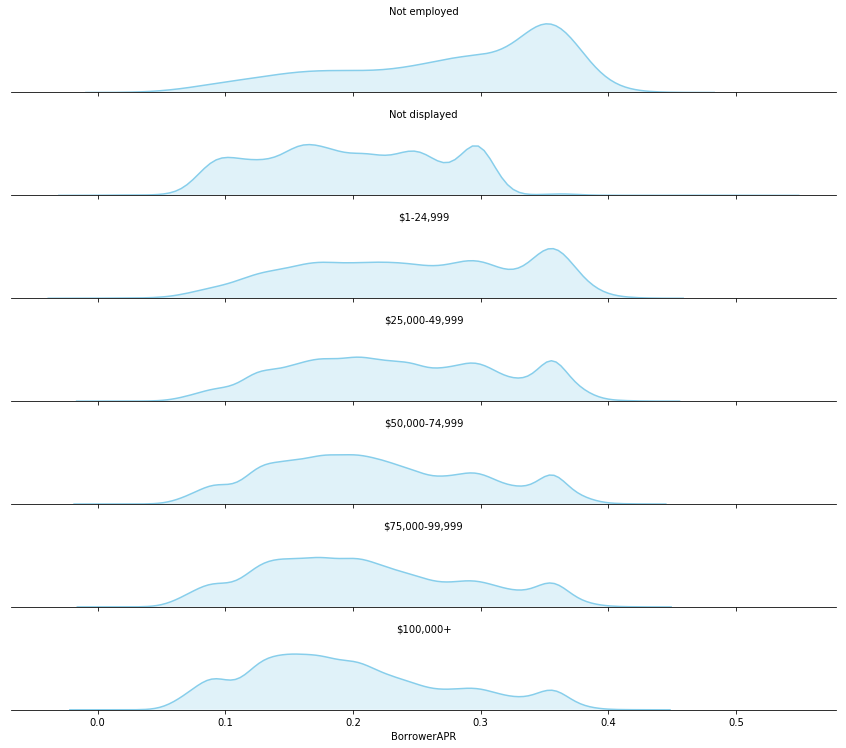

In [116]:
#create order list for FacetGrid
order_list = ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999',
              '$50,000-74,999', '$75,000-99,999', '$100,000+']

#set plot size and create FacetGrid of data
plt.figure(figsize=(18,18))
g = sns.FacetGrid(data = df, row = 'IncomeRange', size = 1.5, aspect = 8,
                  row_order = order_list)
g.map(sns.kdeplot, 'BorrowerAPR', color = 'skyblue', shade = True)

#remove y-axis
g.set(yticks=[])
g.despine(left=True)

#ensure correct titles
g.set_titles(row_template = '{row_name}');


**Step 4:** Interestingly, it is harder to distinguish the difference in median APR when viewed in this way, but the density of the concentrated 35% rate for lower incomes is clearly visible.

In order to zoom in on differences in distributions by percentile, boxplots of the same data are displayed below.

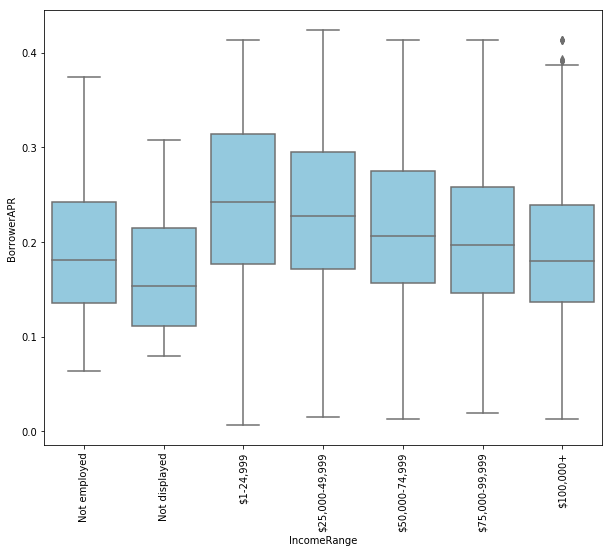

In [168]:
#plot BorrowerAPR boxplots based on IncomeRange category
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_trimmed, x = 'IncomeRange', y = 'BorrowerAPR', color = 'skyblue')
plt.xticks(rotation = 90);

**Step 5:** The boxplot above show a clear negative relationship between income range and APR; however, this effect is dramatically impacted by the concentration of 35% APR loans.

Next, the effect of `BorrrowerAPR` density vs `LoanDuration` is observed visualized.

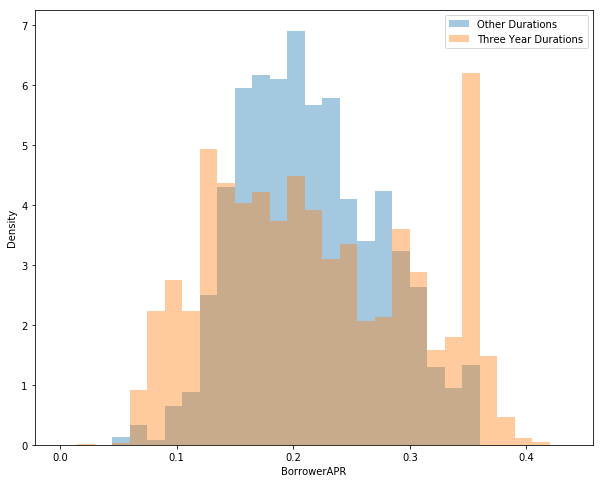

In [174]:
#create two separate dataframe variables queried by other and 36 month Term derations
other_durations = df_trimmed.query("Term == 12 or Term == 60")
three_years = df_trimmed.query("Term == 36")

#set bin size and edges for histograms
binsize = 0.015 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)

#plot overlapping histograms of the BorrowerAPR base on queried categories
plt.figure(figsize=(10, 8))
sns.distplot(other_durations['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = 'Other Durations')
sns.distplot(three_years['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = 'Three Year Durations')
plt.ylabel('Density')
plt.xlabel('BorrowerAPR')
plt.legend()
plt.show();


While cautiously keeping in mind that the two overlapped histograms above do **not** represent counts, there appears to be a much higher occurance of 35% interest rates for 36 month loans.  The blue histogram represents both 12 and 60 month loans which do not share this value concentration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [208]:
cat_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'ListingCategory', 'IsBorrowerHomeowner']
quant_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio',
              'DelinquenciesLast7Years', 'AmountDelinquent']

In [247]:
df_trimmed.BorrowerAPR.mode())
print(other_durations.BorrowerAPR.mode())

0    0.35797
dtype: float64
0    0.27462
dtype: float64


In [277]:
def mode_heatmap(cat_var_l, cat_var_2):
    mode = lambda x:x.value_counts().index[0]
    cat_modes = df_trimmed.groupby([cat_var_l, cat_var_2])['BorrowerAPR'].agg(mode)
    cat_modes = cat_modes.reset_index(name = 'mode')
    cat_modes = cat_modes.pivot(index = 'EmploymentStatus', columns = 'Term', values = 'mode')

    plt.figure(figsize=(8,8))
    heatmap = sns.heatmap(cat_modes, annot = True, fmt = '.3f',
                          cbar_kws = {'label' : 'Mode APR'},
                          cmap = 'Blues');
    return heatmap

def mean_heatmap(cat_var_l, cat_var_2):
    cat_means = df_trimmed.groupby([cat_var_l, cat_var_2]).mean()['BorrowerAPR']
    cat_means = cat_means.reset_index(name = 'mean')
    cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'Term', values = 'mean')

    plt.figure(figsize=(8,8))
    heatmap = sns.heatmap(cat_means, annot = True, fmt = '.3f',
                          cbar_kws = {'label' : 'Mean APR'},
                          cmap = 'Blues');
    return heatmap

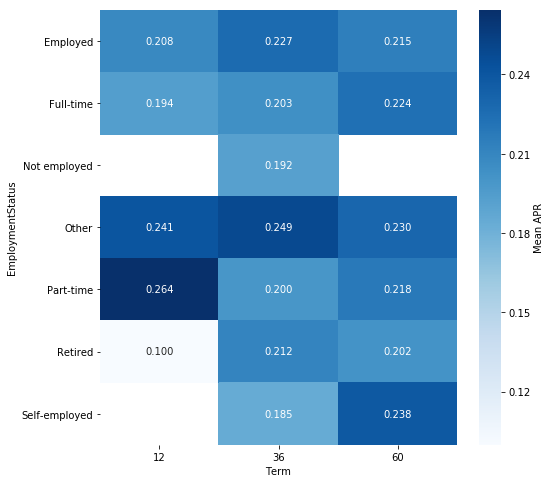

In [282]:
mean_heatmap('EmploymentStatus', 'Term');

C:\Users\jeffr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


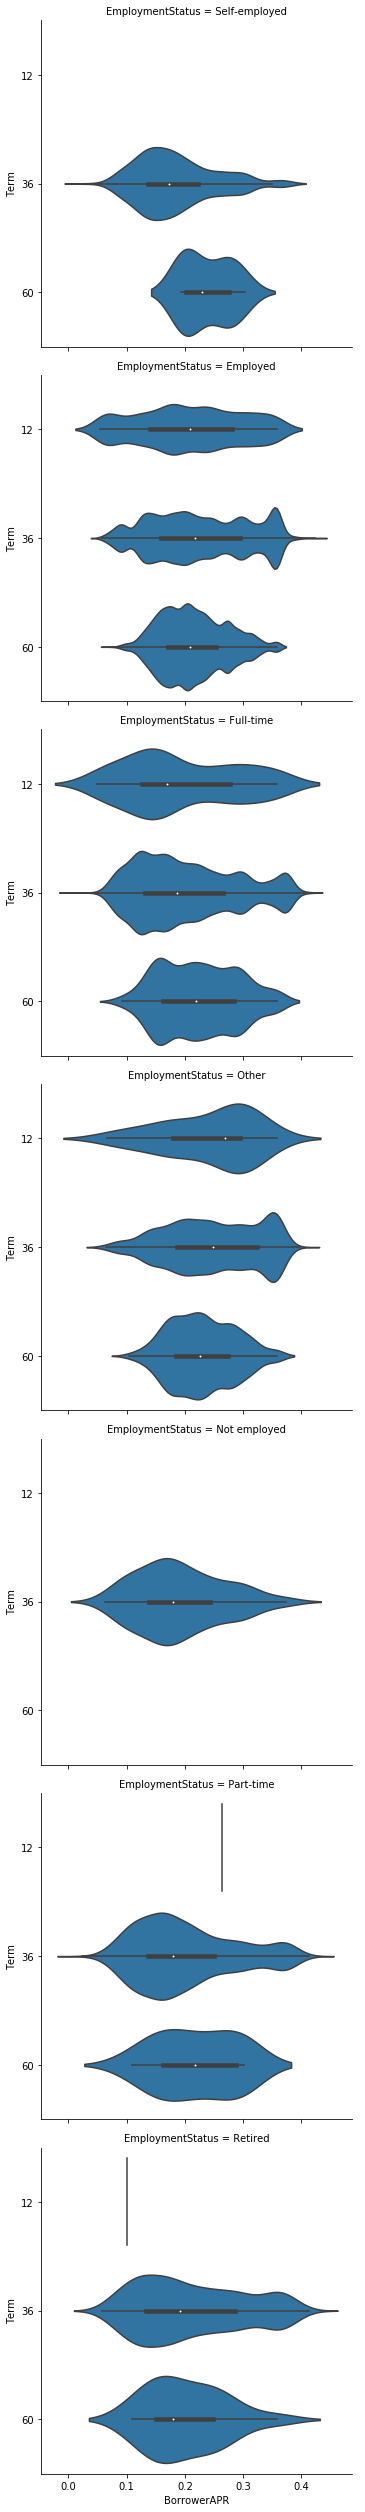

In [244]:
g = sns.FacetGrid(data = df_trimmed, row = 'EmploymentStatus', height=5)
g.map(sns.violinplot, 'BorrowerAPR', 'Term')
g.add_legend();

In [217]:
df_trimmed.DebtToIncomeRatio.describe()

count    97500.000000
mean         0.246408
std          0.144749
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max          1.810000
Name: DebtToIncomeRatio, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!